<a href="https://colab.research.google.com/github/matheus-hrm/deep-learning/blob/main/exploring_with_params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

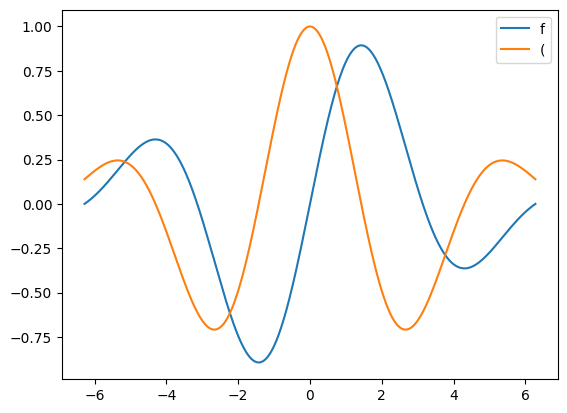

In [7]:
x = np.linspace(-2*np.pi,2*np.pi,501)
fx = np.sin(x) * np.exp(-x**2*.05)

df = np.cos(x) * np.exp(-x**2*0.05) + np.sin(x) * ((-.1*x)*np.exp(-x**2*0.05))
plt.plot(x,fx,x,df)
plt.legend('f(x), df')

In [8]:
def function(x):
  return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
  return np.cos(x) * np.exp(-x**2*0.05) + np.sin(x) * ((-.1*x)*np.exp(-x**2*0.05))

initial local: [-3.51858377]


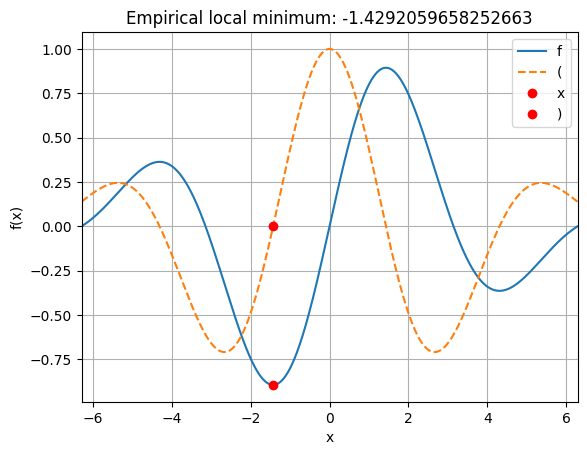

In [12]:
local = np.random.choice(x,1)

rate = .01
epochs = 1000

print(f'initial local: {local}')

for e in range(epochs):
  grad = deriv(local)
  local = local - rate * grad

plt.plot(x,function(x), x,deriv(x),'--')
plt.plot(local,deriv(local),'ro')
plt.plot(local,function(local),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend('f(x), df, local')
plt.title('Empirical local minimum: %s'%local[0])
plt.show()

# Parametric experiments

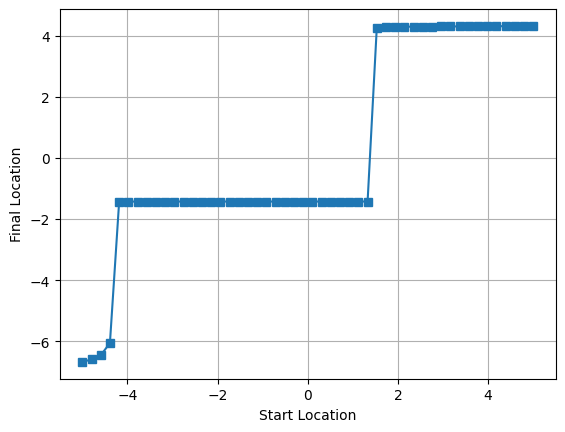

In [14]:
# pick starting locations from a range of values
startlocs = np.linspace(-5,5,50)
final = np.zeros(len(startlocs))

for idx, local in enumerate(startlocs):
  for i in range(epochs):
    grad = deriv(local)
    local = local - rate * grad
  final[idx] = local

plt.plot(startlocs,final,'s-')
plt.xlabel('Start Location')
plt.ylabel('Final Location')
plt.grid()
plt.show()


- plot the starting locations, this graph shows where do we end when we pick selected starting locations, the start loc highly influences the minima where we end, so we can visualize it on other dimensions

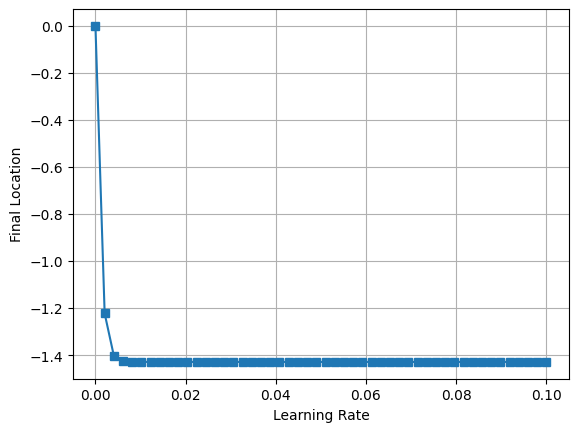

In [16]:
# vary the learning rates
rates = np.linspace(1e-10,1e-1,50)
final = np.zeros(len(rates))

for idx, rate in enumerate(rates):
  #force the start to be 0
  local = 0
  for i in range(epochs):
    grad = deriv(local)
    local = local - rate * grad
  final[idx] = local

plt.plot(rates,final,'s-')
plt.xlabel('Learning Rate')
plt.ylabel('Final Location')
plt.grid()
plt.show()

This plot represents which values "work" for the model to learn, in some tiny tiny values the gradient descent does not move at all, but as soon as we reach some significant value, it brings us to our global minima regardless of the rate.

**We set the start to zero so we can accurately measure which values work for this function.**

In [18]:
# Testing epochs variation

rates = np.linspace(1e-10,1e-1,50)
epochs = np.round(np.linspace(10,500,40))

final = np.zeros((len(rates),len(epochs)))

for idx, rate in enumerate(rates):
  for jdx, epoch in enumerate(epochs):
    local = 0
    for i in range(int(epoch)):
      grad = deriv(local)
      local = local - rate * grad
    final[idx,jdx] = local

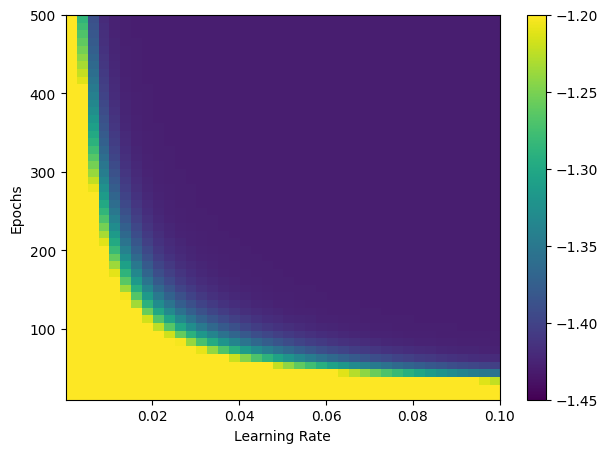

In [22]:
fig, ax = plt.subplots(figsize=(7,5))

plt.imshow(final,extent=[rates[0],rates[-1],epochs[0],epochs[-1]],aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning Rate')
plt.ylabel('Epochs')
plt.colorbar()
plt.show()